In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics 
%matplotlib inline

### Loading and Exploring Dataset: 

In [2]:
data = pd.read_csv("house_info_dataset.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [6]:
data.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## The Correlation Plot :

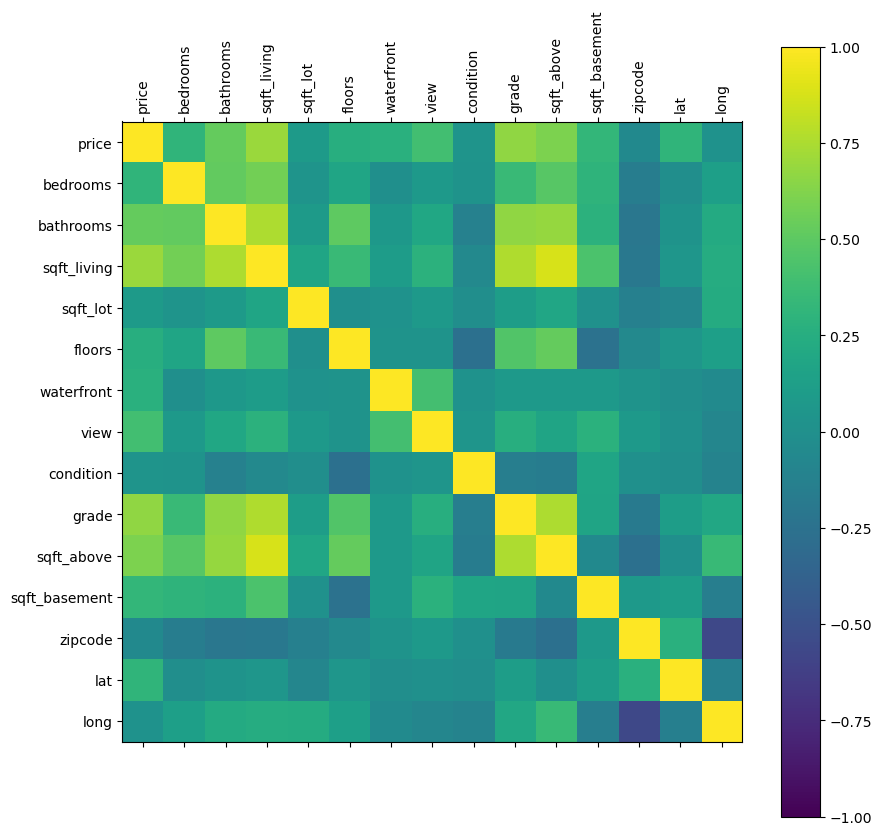

In [8]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[features]
correlations = df.corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,  len(features), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features, rotation = 90)
ax.set_yticklabels(features)
plt.show()

In [9]:
data['waterfront'] = pd.Categorical(data['waterfront'], ordered=True)
data['view'] = pd.Categorical(data['view'], ordered=True)
data['condition'] = pd.Categorical(data['condition'], ordered=True)
data['grade'] = pd.Categorical(data['grade'], ordered=False)
data['zipcode'] = pd.Categorical(data['zipcode'], ordered=False)

In [10]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

### Relationship Between Features and Target : 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

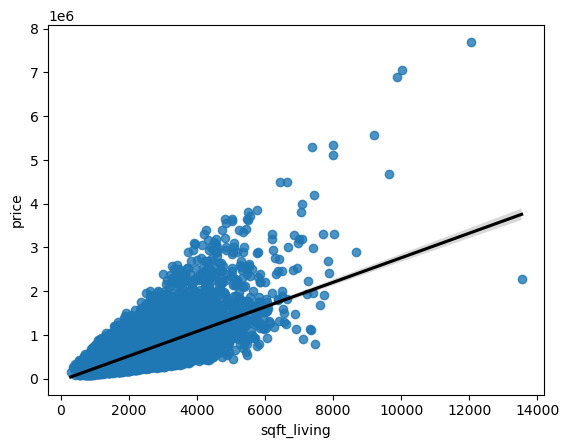

In [11]:
sns.regplot(x = 'sqft_living', y = 'price', data = data, line_kws={"color": "black"})

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

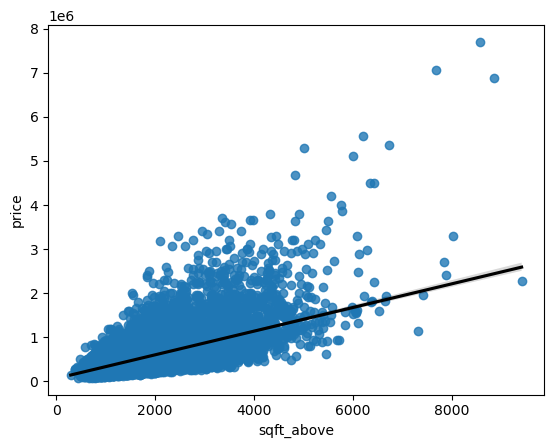

In [12]:
sns.regplot(x = 'sqft_above', y = 'price', data = data, line_kws={"color": "black"})

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

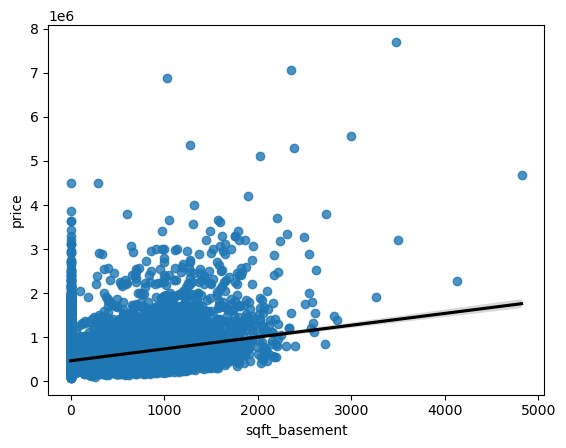

In [13]:
sns.regplot(x = 'sqft_basement', y = 'price', data = data, line_kws={"color": "black"})

<AxesSubplot:xlabel='condition', ylabel='price'>

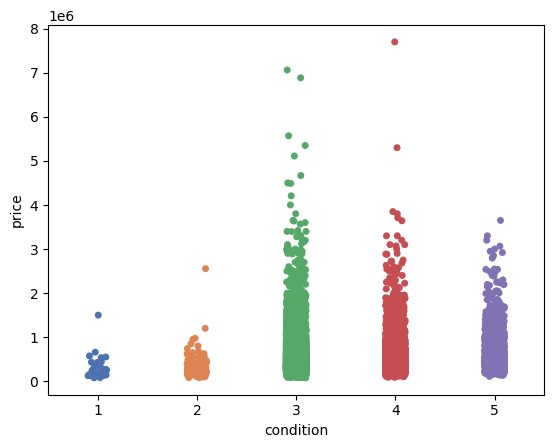

In [14]:
sns.stripplot(x = 'condition', y = 'price', data = data, palette = 'deep')

<AxesSubplot:xlabel='grade', ylabel='price'>

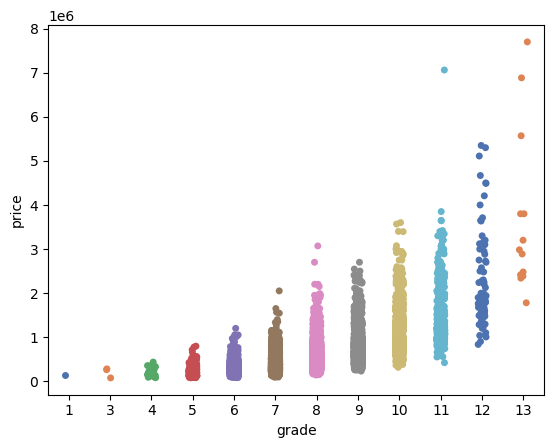

In [15]:
sns.stripplot(x = 'grade', y = 'price', data = data, palette = 'deep')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

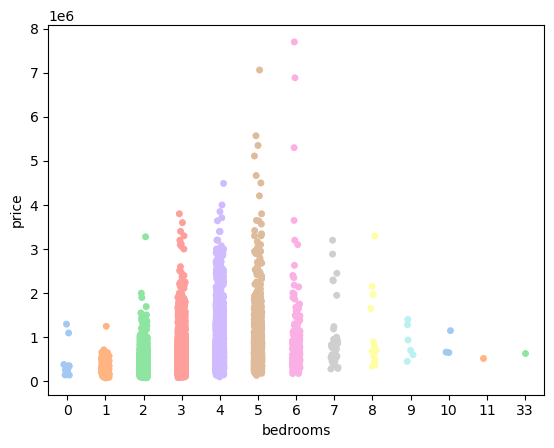

In [16]:
sns.stripplot(x = 'bedrooms', y = 'price', data = data, palette = 'pastel')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

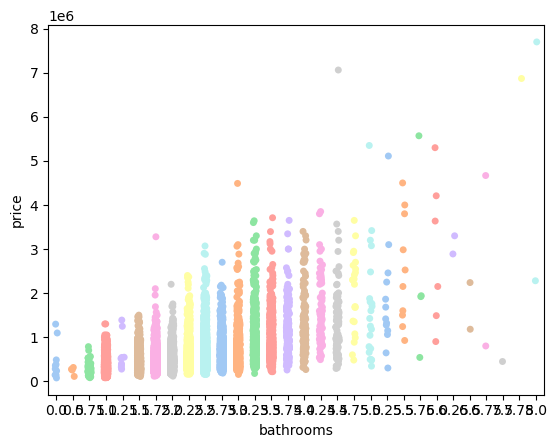

In [17]:
sns.stripplot(x = 'bathrooms', y = 'price', data = data, palette = 'pastel')

### Data Preprocessing :

In [18]:
data = data[data['bedrooms'] < 10]

In [19]:
data = data[data['bathrooms'] < 8]

In [20]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'grade', 'condition']
df = data[cols]

#### One Hot Encoding :

In [22]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [23]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

### Splitting and Training Data :

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [29]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-1.18025859e+04  2.88925898e+04 -5.05132236e+13  2.82819010e-01
 -3.19026818e+04  5.05132236e+13  5.05132236e+13 -2.57863157e+02
  2.34717583e+01  1.87964181e+05 -2.46146943e+05  1.53750000e+01
 -1.32812500e-01  5.33737499e+05  9.17747910e+04  8.29883008e+04
  1.56706801e+05  3.41508918e+05  7.96519045e+04  9.46628750e+04
  1.22162221e+05  1.62479625e+05 -5.12831691e+05 -6.06526159e+05
 -6.21728522e+05 -6.57063143e+05 -6.54771117e+05 -6.34169932e+05
 -5.58960214e+05 -4.46147520e+05 -2.46437713e+05  1.85863126e+05
  8.07689651e+05  2.13020063e+04 -1.96719581e+04  7.14964126e+05
  3.43435573e+05  2.46575334e+05  2.58484064e+05  2.67914959e+05
  1.20249541e+05  5.41053599e+04  1.48604434e+05  8.57997869e+04
  5.92116723e+04 -3.87790352e+04  1.86284671e+05  2.10439834e+05
  5.05816250e+04  2.42232575e+05  2.42236719e+04  2.23674282e+04
 -5.11121439e+04  3.08319106e+05  1.42609660e+05  8.76196306e+04
  1.11510930e+06  4.68325505e+05  4.07079731e+04  2.00875316e+05
  2.13406

### Making Prediction :

In [30]:
predictions = regr.predict(x_test)
print("Mean Squared Error: %.5f" % metrics.mean_squared_error(y_test, predictions))
print("Score : %.5f" % regr.score(x_test, y_test))

Mean Squared Error: 24369146509.22617
Score : 0.83004


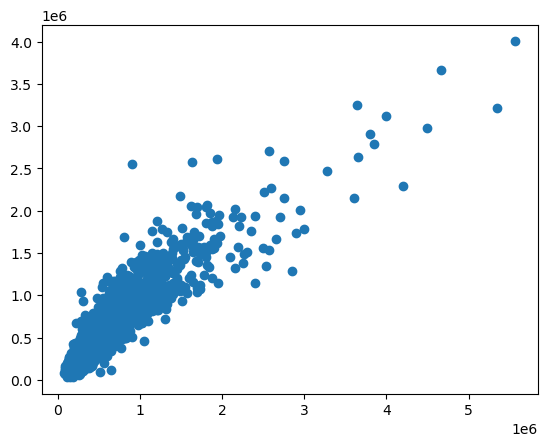

In [31]:
plt.scatter(y_test, predictions)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


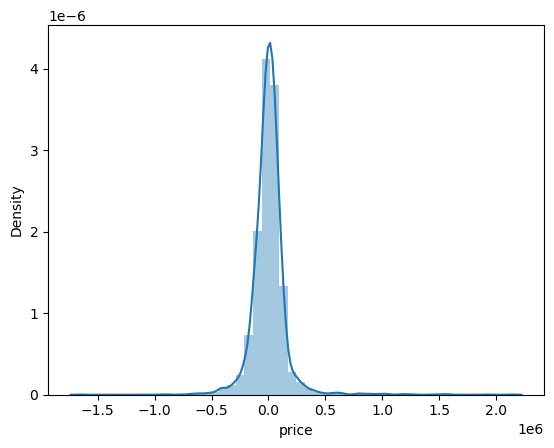

In [32]:
sns.distplot((y_test-predictions),bins=50);

### Evaluation of Model :

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 91315.49405898277
MSE: 24369146509.226166
RMSE: 156106.20266096466


In [34]:
print("R2 score: %.2f"%metrics.r2_score(y_test, predictions))

R2 score: 0.83
